In [ ]:
# 구로동 (11530) / 22년 10월
# 건축년도 / 년월일(20221001) / 법정동 / 보증금액 / 
# 아파트 / 월세금액 / 전용면적 / 층

# -> pandas 

In [231]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
req = requests.get('http://openapi.molit.go.kr:8081/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcAptRent?serviceKey=BAc5c%2B7CgdSM2dp9F0gq%2FN7FR4TwTghq%2BzHtk7BmmX%2B588SuKYRFAW77xC6eaS6kpEZgWxZnz9a1TSk%2FO%2F6gUg%3D%3D&LAWD_CD=11530&DEAL_YMD=202210')

In [3]:
soup = BeautifulSoup(req.text, 'xml')

In [4]:
year = soup.select('건축년도')
month = soup.select('월')
day = soup.select('일')
dong = soup.select('법정동')
garantiemoney = soup.select('보증금액')
apartment = soup.select('아파트')
monthlyrent = soup.select('월세금액')
area = soup.select('전용면적')
floor = soup.select('층')


In [21]:
data = []
for i in range(len(year)) :
    temp = []
    temp.append(year[i].text)
    temp.append(month[i].text)
    temp.append(day[i].text)
    temp.append(dong[i].text)
    temp.append(garantiemoney[i].text.strip())
    temp.append(apartment[i].text)
    temp.append(monthlyrent[i].text.strip())
    temp.append(area[i].text)
    temp.append(floor[i].text)
    data.append(temp)



In [22]:
data

[['2000', '10', '2', ' 신도림동', '31,000', '동아2', '0', '59.595', '4'],
 ['2001', '10', '3', ' 신도림동', '25,000', '대림3', '120', '84.51', '13'],
 ['1996', '10', '4', ' 신도림동', '48,000', '우성2', '0', '84.82', '4'],
 ['2004', '10', '4', ' 신도림동', '60,000', '대림e-편한세상7', '0', '84.928', '3'],
 ['2011', '10', '4', ' 신도림동', '120,000', '디큐브시티', '0', '128.41', '34'],
 ['1999', '10', '4', ' 신도림동', '10,000', '현대홈타운아파트', '55', '59.73', '7'],
 ['1987', '10', '4', ' 신도림동', '40,000', '미성', '0', '83.67', '10'],
 ['1999', '10', '5', ' 신도림동', '35,000', '동아1', '60', '59.978', '25'],
 ['1999', '10', '6', ' 신도림동', '30,000', '동아1', '90', '84.908', '18'],
 ['2018', '10', '6', ' 신도림동', '1,000', '신도림 아르디에', '73', '21.38', '4'],
 ['1994', '10', '6', ' 신도림동', '20,000', '우성5', '70', '59.91', '8'],
 ['2001', '10', '7', ' 신도림동', '70,000', '대림2', '45', '134.99', '3'],
 ['1999', '10', '8', ' 신도림동', '39,500', '대림1', '0', '59.88', '23'],
 ['1989', '10', '8', ' 신도림동', '26,460', '미성', '0', '52.45', '4'],
 ['2003', '10', '8', ' 신도림

In [23]:
df = pd.DataFrame(data, columns = ['건축년도', '월', '일', '법정동', '보증금액', '아파트', '월세금액', '전용면적', '층'])

In [24]:
df

,건축년도,월,일,법정동,보증금액,아파트,월세금액,전용면적,층
0,2000,10,2,신도림동,"31,000",동아2,0,59.595,4
1,2001,10,3,신도림동,"25,000",대림3,120,84.51,13
2,1996,10,4,신도림동,"48,000",우성2,0,84.82,4
3,2004,10,4,신도림동,"60,000",대림e-편한세상7,0,84.928,3
4,2011,10,4,신도림동,"120,000",디큐브시티,0,128.41,34
...,...,...,...,...,...,...,...,...,...
447,2017,10,25,천왕동,"6,452",천왕이펜하우스7단지,3,29.96,3
448,2011,10,26,천왕동,"9,635",천왕이펜하우스4단지,0,49.58,9
449,2014,10,31,천왕동,"57,000",천왕연지타운2단지,0,84.98,4
450,2019,10,8,항동,"50,000",한양수자인에듀힐즈,0,84.9544,3


In [25]:
df['년월일'] = df['건축년도'] + df['월'].str.zfill(2) + df['일'].str.zfill(2)

In [26]:
df

,건축년도,월,일,법정동,보증금액,아파트,월세금액,전용면적,층,년월일
0,2000,10,2,신도림동,"31,000",동아2,0,59.595,4,20001002
1,2001,10,3,신도림동,"25,000",대림3,120,84.51,13,20011003
2,1996,10,4,신도림동,"48,000",우성2,0,84.82,4,19961004
3,2004,10,4,신도림동,"60,000",대림e-편한세상7,0,84.928,3,20041004
4,2011,10,4,신도림동,"120,000",디큐브시티,0,128.41,34,20111004
...,...,...,...,...,...,...,...,...,...,...
447,2017,10,25,천왕동,"6,452",천왕이펜하우스7단지,3,29.96,3,20171025
448,2011,10,26,천왕동,"9,635",천왕이펜하우스4단지,0,49.58,9,20111026
449,2014,10,31,천왕동,"57,000",천왕연지타운2단지,0,84.98,4,20141031
450,2019,10,8,항동,"50,000",한양수자인에듀힐즈,0,84.9544,3,20191008


In [27]:
df.drop(['월', '일'], axis = 1, inplace = True)

In [28]:
df

,건축년도,법정동,보증금액,아파트,월세금액,전용면적,층,년월일
0,2000,신도림동,"31,000",동아2,0,59.595,4,20001002
1,2001,신도림동,"25,000",대림3,120,84.51,13,20011003
2,1996,신도림동,"48,000",우성2,0,84.82,4,19961004
3,2004,신도림동,"60,000",대림e-편한세상7,0,84.928,3,20041004
4,2011,신도림동,"120,000",디큐브시티,0,128.41,34,20111004
...,...,...,...,...,...,...,...,...
447,2017,천왕동,"6,452",천왕이펜하우스7단지,3,29.96,3,20171025
448,2011,천왕동,"9,635",천왕이펜하우스4단지,0,49.58,9,20111026
449,2014,천왕동,"57,000",천왕연지타운2단지,0,84.98,4,20141031
450,2019,항동,"50,000",한양수자인에듀힐즈,0,84.9544,3,20191008


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   건축년도    452 non-null    object
 1   법정동     452 non-null    object
 2   보증금액    452 non-null    object
 3   아파트     452 non-null    object
 4   월세금액    452 non-null    object
 5   전용면적    452 non-null    object
 6   층       452 non-null    object
 7   년월일     452 non-null    object
dtypes: object(8)
memory usage: 28.4+ KB


In [ ]:
# 강사님 방법

# 모든 columns들 불러와야함

In [30]:
soup.items

<items><item><갱신요구권사용> </갱신요구권사용><건축년도>2000</건축년도><계약구분> </계약구분><계약기간> </계약기간><년>2022</년><법정동> 신도림동</법정동><보증금액>    31,000</보증금액><아파트>동아2</아파트><월>10</월><월세금액>         0</월세금액><일>2</일><전용면적>59.595</전용면적><종전계약보증금> </종전계약보증금><종전계약월세> </종전계약월세><지번>644</지번><지역코드>11530</지역코드><층>4</층></item><item><갱신요구권사용> </갱신요구권사용><건축년도>2001</건축년도><계약구분> </계약구분><계약기간> </계약기간><년>2022</년><법정동> 신도림동</법정동><보증금액>    25,000</보증금액><아파트>대림3</아파트><월>10</월><월세금액>       120</월세금액><일>3</일><전용면적>84.51</전용면적><종전계약보증금> </종전계약보증금><종전계약월세> </종전계약월세><지번>691</지번><지역코드>11530</지역코드><층>13</층></item><item><갱신요구권사용> </갱신요구권사용><건축년도>1996</건축년도><계약구분> </계약구분><계약기간> </계약기간><년>2022</년><법정동> 신도림동</법정동><보증금액>    48,000</보증금액><아파트>우성2</아파트><월>10</월><월세금액>         0</월세금액><일>4</일><전용면적>84.82</전용면적><종전계약보증금> </종전계약보증금><종전계약월세> </종전계약월세><지번>639</지번><지역코드>11530</지역코드><층>4</층></item><item><갱신요구권사용> </갱신요구권사용><건축년도>2004</건축년도><계약구분> </계약구분><계약기간> </계약기간><년>2022</년><법정동> 신도림동</법정동><보증금액>    60,000</보증금액><아파트>대림e-편한세상7</아파트><월>10</월><월세금액>       

In [32]:
soup.items()[0]

<item><갱신요구권사용> </갱신요구권사용><건축년도>2000</건축년도><계약구분> </계약구분><계약기간> </계약기간><년>2022</년><법정동> 신도림동</법정동><보증금액>    31,000</보증금액><아파트>동아2</아파트><월>10</월><월세금액>         0</월세금액><일>2</일><전용면적>59.595</전용면적><종전계약보증금> </종전계약보증금><종전계약월세> </종전계약월세><지번>644</지번><지역코드>11530</지역코드><층>4</층></item>

In [33]:
for item in soup.items()[0] :
    print(item)
    print('------')

<갱신요구권사용> </갱신요구권사용>
------
<건축년도>2000</건축년도>
------
<계약구분> </계약구분>
------
<계약기간> </계약기간>
------
<년>2022</년>
------
<법정동> 신도림동</법정동>
------
<보증금액>    31,000</보증금액>
------
<아파트>동아2</아파트>
------
<월>10</월>
------
<월세금액>         0</월세금액>
------
<일>2</일>
------
<전용면적>59.595</전용면적>
------
<종전계약보증금> </종전계약보증금>
------
<종전계약월세> </종전계약월세>
------
<지번>644</지번>
------
<지역코드>11530</지역코드>
------
<층>4</층>
------


In [34]:
for item in soup.items()[0] :
    print(item.name)
    print('------')

갱신요구권사용
------
건축년도
------
계약구분
------
계약기간
------
년
------
법정동
------
보증금액
------
아파트
------
월
------
월세금액
------
일
------
전용면적
------
종전계약보증금
------
종전계약월세
------
지번
------
지역코드
------
층
------


In [35]:
col_names = []
for item in soup.items()[0] :
    col_names.append(item.name)

In [36]:
col_names

['갱신요구권사용',
 '건축년도',
 '계약구분',
 '계약기간',
 '년',
 '법정동',
 '보증금액',
 '아파트',
 '월',
 '월세금액',
 '일',
 '전용면적',
 '종전계약보증금',
 '종전계약월세',
 '지번',
 '지역코드',
 '층']

In [37]:
soup.items

<items><item><갱신요구권사용> </갱신요구권사용><건축년도>2000</건축년도><계약구분> </계약구분><계약기간> </계약기간><년>2022</년><법정동> 신도림동</법정동><보증금액>    31,000</보증금액><아파트>동아2</아파트><월>10</월><월세금액>         0</월세금액><일>2</일><전용면적>59.595</전용면적><종전계약보증금> </종전계약보증금><종전계약월세> </종전계약월세><지번>644</지번><지역코드>11530</지역코드><층>4</층></item><item><갱신요구권사용> </갱신요구권사용><건축년도>2001</건축년도><계약구분> </계약구분><계약기간> </계약기간><년>2022</년><법정동> 신도림동</법정동><보증금액>    25,000</보증금액><아파트>대림3</아파트><월>10</월><월세금액>       120</월세금액><일>3</일><전용면적>84.51</전용면적><종전계약보증금> </종전계약보증금><종전계약월세> </종전계약월세><지번>691</지번><지역코드>11530</지역코드><층>13</층></item><item><갱신요구권사용> </갱신요구권사용><건축년도>1996</건축년도><계약구분> </계약구분><계약기간> </계약기간><년>2022</년><법정동> 신도림동</법정동><보증금액>    48,000</보증금액><아파트>우성2</아파트><월>10</월><월세금액>         0</월세금액><일>4</일><전용면적>84.82</전용면적><종전계약보증금> </종전계약보증금><종전계약월세> </종전계약월세><지번>639</지번><지역코드>11530</지역코드><층>4</층></item><item><갱신요구권사용> </갱신요구권사용><건축년도>2004</건축년도><계약구분> </계약구분><계약기간> </계약기간><년>2022</년><법정동> 신도림동</법정동><보증금액>    60,000</보증금액><아파트>대림e-편한세상7</아파트><월>10</월><월세금액>       

In [38]:
for item in soup.items :
    print(item)
    print('----------')

<item><갱신요구권사용> </갱신요구권사용><건축년도>2000</건축년도><계약구분> </계약구분><계약기간> </계약기간><년>2022</년><법정동> 신도림동</법정동><보증금액>    31,000</보증금액><아파트>동아2</아파트><월>10</월><월세금액>         0</월세금액><일>2</일><전용면적>59.595</전용면적><종전계약보증금> </종전계약보증금><종전계약월세> </종전계약월세><지번>644</지번><지역코드>11530</지역코드><층>4</층></item>
----------
<item><갱신요구권사용> </갱신요구권사용><건축년도>2001</건축년도><계약구분> </계약구분><계약기간> </계약기간><년>2022</년><법정동> 신도림동</법정동><보증금액>    25,000</보증금액><아파트>대림3</아파트><월>10</월><월세금액>       120</월세금액><일>3</일><전용면적>84.51</전용면적><종전계약보증금> </종전계약보증금><종전계약월세> </종전계약월세><지번>691</지번><지역코드>11530</지역코드><층>13</층></item>
----------
<item><갱신요구권사용> </갱신요구권사용><건축년도>1996</건축년도><계약구분> </계약구분><계약기간> </계약기간><년>2022</년><법정동> 신도림동</법정동><보증금액>    48,000</보증금액><아파트>우성2</아파트><월>10</월><월세금액>         0</월세금액><일>4</일><전용면적>84.82</전용면적><종전계약보증금> </종전계약보증금><종전계약월세> </종전계약월세><지번>639</지번><지역코드>11530</지역코드><층>4</층></item>
----------
<item><갱신요구권사용> </갱신요구권사용><건축년도>2004</건축년도><계약구분> </계약구분><계약기간> </계약기간><년>2022</년><법정동> 신도림동</법정동><보증금액>    60,000</보증금액><아파트>대림e-편한세상

In [39]:
for item in soup.items :
    for t in item :
        print(t.text)
        print('--------')

 
--------
2000
--------
 
--------
 
--------
2022
--------
 신도림동
--------
    31,000
--------
동아2
--------
10
--------
         0
--------
2
--------
59.595
--------
 
--------
 
--------
644
--------
11530
--------
4
--------
 
--------
2001
--------
 
--------
 
--------
2022
--------
 신도림동
--------
    25,000
--------
대림3
--------
10
--------
       120
--------
3
--------
84.51
--------
 
--------
 
--------
691
--------
11530
--------
13
--------
 
--------
1996
--------
 
--------
 
--------
2022
--------
 신도림동
--------
    48,000
--------
우성2
--------
10
--------
         0
--------
4
--------
84.82
--------
 
--------
 
--------
639
--------
11530
--------
4
--------
 
--------
2004
--------
 
--------
 
--------
2022
--------
 신도림동
--------
    60,000
--------
대림e-편한세상7
--------
10
--------
         0
--------
4
--------
84.928
--------
 
--------
 
--------
649
--------
11530
--------
3
--------
 
--------
2011
--------
 
--------
 
--------
2022
--------
 신도림동
--------
   

In [54]:
data = []
for item in soup.items :
    temp = []
    for t in item :
        temp.append(t.text.strip())
    data.append(temp)

In [55]:
data

[['',
  '2000',
  '',
  '',
  '2022',
  '신도림동',
  '31,000',
  '동아2',
  '10',
  '0',
  '2',
  '59.595',
  '',
  '',
  '644',
  '11530',
  '4'],
 ['',
  '2001',
  '',
  '',
  '2022',
  '신도림동',
  '25,000',
  '대림3',
  '10',
  '120',
  '3',
  '84.51',
  '',
  '',
  '691',
  '11530',
  '13'],
 ['',
  '1996',
  '',
  '',
  '2022',
  '신도림동',
  '48,000',
  '우성2',
  '10',
  '0',
  '4',
  '84.82',
  '',
  '',
  '639',
  '11530',
  '4'],
 ['',
  '2004',
  '',
  '',
  '2022',
  '신도림동',
  '60,000',
  '대림e-편한세상7',
  '10',
  '0',
  '4',
  '84.928',
  '',
  '',
  '649',
  '11530',
  '3'],
 ['',
  '2011',
  '',
  '',
  '2022',
  '신도림동',
  '120,000',
  '디큐브시티',
  '10',
  '0',
  '4',
  '128.41',
  '',
  '',
  '692',
  '11530',
  '34'],
 ['',
  '1999',
  '',
  '',
  '2022',
  '신도림동',
  '10,000',
  '현대홈타운아파트',
  '10',
  '55',
  '4',
  '59.73',
  '',
  '',
  '641',
  '11530',
  '7'],
 ['',
  '1987',
  '',
  '',
  '2022',
  '신도림동',
  '40,000',
  '미성',
  '10',
  '0',
  '4',
  '83.67',
  '',
  '',
  '290',
  '1

In [56]:
df = pd.DataFrame(data, columns = col_names)

In [59]:
df[['건축년도', '년', '법정동', '보증금액', '아파트', '월', '월세금액', '일', '전용면적', '지번', '지역코드', '층']]

,건축년도,년,법정동,보증금액,아파트,월,월세금액,일,전용면적,지번,지역코드,층
0,2000,2022,신도림동,"31,000",동아2,10,0,2,59.595,644,11530,4
1,2001,2022,신도림동,"25,000",대림3,10,120,3,84.51,691,11530,13
2,1996,2022,신도림동,"48,000",우성2,10,0,4,84.82,639,11530,4
3,2004,2022,신도림동,"60,000",대림e-편한세상7,10,0,4,84.928,649,11530,3
4,2011,2022,신도림동,"120,000",디큐브시티,10,0,4,128.41,692,11530,34
...,...,...,...,...,...,...,...,...,...,...,...,...
447,2017,2022,천왕동,"6,452",천왕이펜하우스7단지,10,3,25,29.96,274,11530,3
448,2011,2022,천왕동,"9,635",천왕이펜하우스4단지,10,0,26,49.58,273,11530,9
449,2014,2022,천왕동,"57,000",천왕연지타운2단지,10,0,31,84.98,281,11530,4
450,2019,2022,항동,"50,000",한양수자인에듀힐즈,10,0,8,84.9544,가-241,11530,3


In [61]:
df

,갱신요구권사용,건축년도,계약구분,계약기간,년,법정동,보증금액,아파트,월,월세금액,일,전용면적,종전계약보증금,종전계약월세,지번,지역코드,층
0,,2000,,,2022,신도림동,"31,000",동아2,10,0,2,59.595,,,644,11530,4
1,,2001,,,2022,신도림동,"25,000",대림3,10,120,3,84.51,,,691,11530,13
2,,1996,,,2022,신도림동,"48,000",우성2,10,0,4,84.82,,,639,11530,4
3,,2004,,,2022,신도림동,"60,000",대림e-편한세상7,10,0,4,84.928,,,649,11530,3
4,,2011,,,2022,신도림동,"120,000",디큐브시티,10,0,4,128.41,,,692,11530,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,,2017,,,2022,천왕동,"6,452",천왕이펜하우스7단지,10,3,25,29.96,,,274,11530,3
448,,2011,,,2022,천왕동,"9,635",천왕이펜하우스4단지,10,0,26,49.58,,,273,11530,9
449,,2014,,,2022,천왕동,"57,000",천왕연지타운2단지,10,0,31,84.98,,,281,11530,4
450,,2019,,,2022,항동,"50,000",한양수자인에듀힐즈,10,0,8,84.9544,,,가-241,11530,3


In [63]:
import numpy as np

In [71]:
df = df.replace('',np.nan)

In [72]:
df = df.dropna(axis = 1)

In [73]:
df

,건축년도,년,법정동,보증금액,아파트,월,월세금액,일,전용면적,지번,지역코드,층
0,2000,2022,신도림동,"31,000",동아2,10,0,2,59.595,644,11530,4
1,2001,2022,신도림동,"25,000",대림3,10,120,3,84.51,691,11530,13
2,1996,2022,신도림동,"48,000",우성2,10,0,4,84.82,639,11530,4
3,2004,2022,신도림동,"60,000",대림e-편한세상7,10,0,4,84.928,649,11530,3
4,2011,2022,신도림동,"120,000",디큐브시티,10,0,4,128.41,692,11530,34
...,...,...,...,...,...,...,...,...,...,...,...,...
447,2017,2022,천왕동,"6,452",천왕이펜하우스7단지,10,3,25,29.96,274,11530,3
448,2011,2022,천왕동,"9,635",천왕이펜하우스4단지,10,0,26,49.58,273,11530,9
449,2014,2022,천왕동,"57,000",천왕연지타운2단지,10,0,31,84.98,281,11530,4
450,2019,2022,항동,"50,000",한양수자인에듀힐즈,10,0,8,84.9544,가-241,11530,3


In [74]:
df['계약일'] = df['년'] + df['월'].str.zfill(2) + df['일'].str.zfill(2)

In [76]:
df

,건축년도,년,법정동,보증금액,아파트,월,월세금액,일,전용면적,지번,지역코드,층,계약일
0,2000,2022,신도림동,"31,000",동아2,10,0,2,59.595,644,11530,4,20221002
1,2001,2022,신도림동,"25,000",대림3,10,120,3,84.51,691,11530,13,20221003
2,1996,2022,신도림동,"48,000",우성2,10,0,4,84.82,639,11530,4,20221004
3,2004,2022,신도림동,"60,000",대림e-편한세상7,10,0,4,84.928,649,11530,3,20221004
4,2011,2022,신도림동,"120,000",디큐브시티,10,0,4,128.41,692,11530,34,20221004
...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,2017,2022,천왕동,"6,452",천왕이펜하우스7단지,10,3,25,29.96,274,11530,3,20221025
448,2011,2022,천왕동,"9,635",천왕이펜하우스4단지,10,0,26,49.58,273,11530,9,20221026
449,2014,2022,천왕동,"57,000",천왕연지타운2단지,10,0,31,84.98,281,11530,4,20221031
450,2019,2022,항동,"50,000",한양수자인에듀힐즈,10,0,8,84.9544,가-241,11530,3,20221008


In [77]:
df.drop(['년','월','일'], axis = 1, inplace = True)

In [78]:
df

,건축년도,법정동,보증금액,아파트,월세금액,전용면적,지번,지역코드,층,계약일
0,2000,신도림동,"31,000",동아2,0,59.595,644,11530,4,20221002
1,2001,신도림동,"25,000",대림3,120,84.51,691,11530,13,20221003
2,1996,신도림동,"48,000",우성2,0,84.82,639,11530,4,20221004
3,2004,신도림동,"60,000",대림e-편한세상7,0,84.928,649,11530,3,20221004
4,2011,신도림동,"120,000",디큐브시티,0,128.41,692,11530,34,20221004
...,...,...,...,...,...,...,...,...,...,...
447,2017,천왕동,"6,452",천왕이펜하우스7단지,3,29.96,274,11530,3,20221025
448,2011,천왕동,"9,635",천왕이펜하우스4단지,0,49.58,273,11530,9,20221026
449,2014,천왕동,"57,000",천왕연지타운2단지,0,84.98,281,11530,4,20221031
450,2019,항동,"50,000",한양수자인에듀힐즈,0,84.9544,가-241,11530,3,20221008


In [ ]:
# 구로동(11530) / 22년 6월 ~ 10월까지의 데이터 프레임을 가져오시오.

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   건축년도    452 non-null    object
 1   법정동     452 non-null    object
 2   보증금액    452 non-null    object
 3   아파트     452 non-null    object
 4   월세금액    452 non-null    object
 5   전용면적    452 non-null    object
 6   지번      452 non-null    object
 7   지역코드    452 non-null    object
 8   층       452 non-null    object
 9   계약일     452 non-null    object
dtypes: object(10)
memory usage: 35.4+ KB


a = requests.get('http://openapi.molit.go.kr:8081/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcAptRent?serviceKey=BAc5c%2B7CgdSM2dp9F0gq%2FN7FR4TwTghq%2BzHtk7BmmX%2B588SuKYRFAW77xC6eaS6kpEZgWxZnz9a1TSk%2FO%2F6gUg%3D%3D&LAWD_CD=11530&DEAL_YMD=202206')
b = requests.get('http://openapi.molit.go.kr:8081/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcAptRent?serviceKey=BAc5c%2B7CgdSM2dp9F0gq%2FN7FR4TwTghq%2BzHtk7BmmX%2B588SuKYRFAW77xC6eaS6kpEZgWxZnz9a1TSk%2FO%2F6gUg%3D%3D&LAWD_CD=11530&DEAL_YMD=202207')
c = requests.get('http://openapi.molit.go.kr:8081/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcAptRent?serviceKey=BAc5c%2B7CgdSM2dp9F0gq%2FN7FR4TwTghq%2BzHtk7BmmX%2B588SuKYRFAW77xC6eaS6kpEZgWxZnz9a1TSk%2FO%2F6gUg%3D%3D&LAWD_CD=11530&DEAL_YMD=202208')
d = requests.get('http://openapi.molit.go.kr:8081/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcAptRent?serviceKey=BAc5c%2B7CgdSM2dp9F0gq%2FN7FR4TwTghq%2BzHtk7BmmX%2B588SuKYRFAW77xC6eaS6kpEZgWxZnz9a1TSk%2FO%2F6gUg%3D%3D&LAWD_CD=11530&DEAL_YMD=202209')
e = requests.get('http://openapi.molit.go.kr:8081/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcAptRent?serviceKey=BAc5c%2B7CgdSM2dp9F0gq%2FN7FR4TwTghq%2BzHtk7BmmX%2B588SuKYRFAW77xC6eaS6kpEZgWxZnz9a1TSk%2FO%2F6gUg%3D%3D&LAWD_CD=11530&DEAL_YMD=202210')

In [ ]:
# 강사님 풀이법

In [108]:
for m in range(6, 11) :
    url = 'http://openapi.molit.go.kr:8081/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcAptRent'
    serviceKey = 'BAc5c%2B7CgdSM2dp9F0gq%2FN7FR4TwTghq%2BzHtk7BmmX%2B588SuKYRFAW77xC6eaS6kpEZgWxZnz9a1TSk%2FO%2F6gUg%3D%3D'
    lawd_cd = '11530' #지역
    deal_ymd = '2022' + str(m).zfill(2) #계약일
    
    api_url = url + '?' + 'serviceKey=' + serviceKey + '&LAWD_CD=' \
    + lawd_cd + '&DEAL_YMD=' + deal_ymd
      
    
    print(api_url)

http://openapi.molit.go.kr:8081/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcAptRent?serviceKey=BAc5c%2B7CgdSM2dp9F0gq%2FN7FR4TwTghq%2BzHtk7BmmX%2B588SuKYRFAW77xC6eaS6kpEZgWxZnz9a1TSk%2FO%2F6gUg%3D%3D&LAWD_CD=11530&DEAL_YMD=202206
http://openapi.molit.go.kr:8081/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcAptRent?serviceKey=BAc5c%2B7CgdSM2dp9F0gq%2FN7FR4TwTghq%2BzHtk7BmmX%2B588SuKYRFAW77xC6eaS6kpEZgWxZnz9a1TSk%2FO%2F6gUg%3D%3D&LAWD_CD=11530&DEAL_YMD=202207
http://openapi.molit.go.kr:8081/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcAptRent?serviceKey=BAc5c%2B7CgdSM2dp9F0gq%2FN7FR4TwTghq%2BzHtk7BmmX%2B588SuKYRFAW77xC6eaS6kpEZgWxZnz9a1TSk%2FO%2F6gUg%3D%3D&LAWD_CD=11530&DEAL_YMD=202208
http://openapi.molit.go.kr:8081/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcAptRent?serviceKey=BAc5c%2B7CgdSM2dp9F0gq%2FN7FR4TwTghq%2BzHtk7BmmX%2B588SuKYRFAW77xC6eaS6kpEZgWxZnz9a1TSk%2FO%2F6gUg%3D%3D&LAWD_CD=11530&DEAL_YMD=202

In [121]:
data = []
col_names = []
for m in range(6, 11) :
    url = 'http://openapi.molit.go.kr:8081/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcAptRent'
    serviceKey = 'BAc5c%2B7CgdSM2dp9F0gq%2FN7FR4TwTghq%2BzHtk7BmmX%2B588SuKYRFAW77xC6eaS6kpEZgWxZnz9a1TSk%2FO%2F6gUg%3D%3D'
    lawd_cd = '11530' #지역
    deal_ymd = '2022' + str(m).zfill(2) #계약일
    
    api_url = url + '?' + 'serviceKey=' + serviceKey + '&LAWD_CD=' \
    + lawd_cd + '&DEAL_YMD=' + deal_ymd

    req = requests.get(api_url)
    soup = BeautifulSoup(req.text, 'xml')
    
    if not col_names :
        for item in soup.items()[0] :
            col_names.append(item.name)
    
    for item in soup.items :
        temp = []
        for t in item :
            temp.append(t.text.strip())
        data.append(temp)

In [122]:
df = pd.DataFrame(data, columns = col_names)

In [123]:
df

,갱신요구권사용,건축년도,계약구분,계약기간,년,법정동,보증금액,아파트,월,월세금액,일,전용면적,종전계약보증금,종전계약월세,지번,지역코드,층
0,,2011,신규,22.08~24.08,2022,신도림동,"58,800",디큐브시티,6,0,1,59.16,0,0,692,11530,5
1,사용,2000,갱신,22.10~24.10,2022,신도림동,"41,400",동아2,6,0,1,59.595,"39,500",0,644,11530,19
2,,2003,신규,22.08~24.08,2022,신도림동,"130,000",대림e-편한세상4,6,0,1,117.74,0,0,646,11530,8
3,,2000,,,2022,신도림동,"42,900",동아3,6,0,1,60,,,645,11530,13
4,,1999,신규,22.08~24.08,2022,신도림동,"75,000",동아1,6,0,1,84.908,0,0,643,11530,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4130,,2017,,,2022,천왕동,"6,452",천왕이펜하우스7단지,10,3,25,29.96,,,274,11530,3
4131,,2011,,,2022,천왕동,"9,635",천왕이펜하우스4단지,10,0,26,49.58,,,273,11530,9
4132,,2014,,,2022,천왕동,"57,000",천왕연지타운2단지,10,0,31,84.98,,,281,11530,4
4133,,2019,,,2022,항동,"50,000",한양수자인에듀힐즈,10,0,8,84.9544,,,가-241,11530,3


In [110]:
# 생각하기
if not [] :
    print('true')
else :
    print('fasle')

true


In [ ]:
# 출력 확인하는 방법

In [232]:
from tqdm import tqdm #for문을 얼마나 진행했는지 확인 가능

In [233]:
data = []
col_names = []
for m in tqdm(range(6, 11)) :
    url = 'http://openapi.molit.go.kr:8081/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcAptRent'
    serviceKey = 'BAc5c%2B7CgdSM2dp9F0gq%2FN7FR4TwTghq%2BzHtk7BmmX%2B588SuKYRFAW77xC6eaS6kpEZgWxZnz9a1TSk%2FO%2F6gUg%3D%3D'
    lawd_cd = '11530' #지역
    deal_ymd = '2022' + str(m).zfill(2) #계약일
    
    api_url = url + '?' + 'serviceKey=' + serviceKey + '&LAWD_CD=' \
    + lawd_cd + '&DEAL_YMD=' + deal_ymd

    req = requests.get(api_url)
    soup = BeautifulSoup(req.text, 'xml')
    
    if not col_names :
        for item in soup.items()[0] :
            col_names.append(item.name)
    
    for item in soup.items :
        temp = []
        for t in item :
            temp.append(t.text.strip())
        data.append(temp)

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:04<00:00,  1.09it/s]


In [234]:
df.shape

(4135, 17)

In [131]:
df.isnull().sum()

갱신요구권사용    0
건축년도       0
계약구분       0
계약기간       0
년          0
법정동        0
보증금액       0
아파트        0
월          0
월세금액       0
일          0
전용면적       0
종전계약보증금    0
종전계약월세     0
지번         0
지역코드       0
층          0
dtype: int64

In [133]:
df = df.replace('', np.nan)

In [134]:
df.isnull().sum()

갱신요구권사용    3627
건축년도          0
계약구분       1641
계약기간       1812
년             0
법정동           0
보증금액          0
아파트           0
월             0
월세금액          0
일             0
전용면적          0
종전계약보증금    1641
종전계약월세     1641
지번            0
지역코드          0
층             0
dtype: int64

In [137]:
df['계약구분'].unique()

array(['신규', '갱신', nan], dtype=object)

In [138]:
df['계약구분'].value_counts()

갱신    1433
신규    1061
Name: 계약구분, dtype: int64

In [139]:
df

,갱신요구권사용,건축년도,계약구분,계약기간,년,법정동,보증금액,아파트,월,월세금액,일,전용면적,종전계약보증금,종전계약월세,지번,지역코드,층
0,NaN,2011,신규,22.08~24.08,2022,신도림동,"58,800",디큐브시티,6,0,1,59.16,0,0,692,11530,5
1,사용,2000,갱신,22.10~24.10,2022,신도림동,"41,400",동아2,6,0,1,59.595,"39,500",0,644,11530,19
2,NaN,2003,신규,22.08~24.08,2022,신도림동,"130,000",대림e-편한세상4,6,0,1,117.74,0,0,646,11530,8
3,NaN,2000,NaN,NaN,2022,신도림동,"42,900",동아3,6,0,1,60,NaN,NaN,645,11530,13
4,NaN,1999,신규,22.08~24.08,2022,신도림동,"75,000",동아1,6,0,1,84.908,0,0,643,11530,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4130,NaN,2017,NaN,NaN,2022,천왕동,"6,452",천왕이펜하우스7단지,10,3,25,29.96,NaN,NaN,274,11530,3
4131,NaN,2011,NaN,NaN,2022,천왕동,"9,635",천왕이펜하우스4단지,10,0,26,49.58,NaN,NaN,273,11530,9
4132,NaN,2014,NaN,NaN,2022,천왕동,"57,000",천왕연지타운2단지,10,0,31,84.98,NaN,NaN,281,11530,4
4133,NaN,2019,NaN,NaN,2022,항동,"50,000",한양수자인에듀힐즈,10,0,8,84.9544,NaN,NaN,가-241,11530,3


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4135 entries, 0 to 4134
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   갱신요구권사용  508 non-null    object
 1   건축년도     4135 non-null   object
 2   계약구분     2494 non-null   object
 3   계약기간     2323 non-null   object
 4   년        4135 non-null   object
 5   법정동      4135 non-null   object
 6   보증금액     4135 non-null   object
 7   아파트      4135 non-null   object
 8   월        4135 non-null   object
 9   월세금액     4135 non-null   object
 10  일        4135 non-null   object
 11  전용면적     4135 non-null   object
 12  종전계약보증금  2494 non-null   object
 13  종전계약월세   2494 non-null   object
 14  지번       4135 non-null   object
 15  지역코드     4135 non-null   object
 16  층        4135 non-null   object
dtypes: object(17)
memory usage: 549.3+ KB


In [148]:
df['아파트'].value_counts()

센트레빌레우스1단지    1050
천왕이펜하우스7단지     202
고척아이파크          98
현대              91
한마을             84
              ... 
우성에비뉴            1
(794-46)         1
(743-10)         1
대성               1
리치안풍산            1
Name: 아파트, Length: 327, dtype: int64

## 월별 월세 / 전세 변화량(전용면적 고려)
## 월세의 경우 보증금액 변화도 고려

In [182]:
sent_ap = df[df['아파트'] == '센트레빌레우스1단지']

In [ ]:
# 월세

In [183]:
sent_ap

,갱신요구권사용,건축년도,계약구분,계약기간,년,법정동,보증금액,아파트,월,월세금액,일,전용면적,종전계약보증금,종전계약월세,지번,지역코드,층
481,NaN,2020,갱신,22.08~24.08,2022,개봉동,"25,825",센트레빌레우스1단지,6,40,2,74.9361,"25,000",39,497,11530,15
482,NaN,2020,갱신,22.07~24.07,2022,개봉동,"22,726",센트레빌레우스1단지,6,55,2,84.9625,"22,000",53,497,11530,2
483,NaN,2020,갱신,22.08~24.08,2022,개봉동,"27,891",센트레빌레우스1단지,6,45,2,84.9407,"27,000",44,497,11530,13
484,NaN,2020,갱신,22.08~24.08,2022,개봉동,"27,891",센트레빌레우스1단지,6,43,2,84.9625,"27,000",42,497,11530,9
485,NaN,2020,갱신,22.08~24.08,2022,개봉동,"25,825",센트레빌레우스1단지,6,40,2,74.9361,"25,000",39,497,11530,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4046,NaN,2020,NaN,NaN,2022,개봉동,"25,825",센트레빌레우스1단지,10,40,25,74.9361,NaN,NaN,497,11530,19
4048,NaN,2020,NaN,NaN,2022,개봉동,"20,660",센트레빌레우스1단지,10,43,25,74.9361,NaN,NaN,497,11530,2
4049,NaN,2020,NaN,NaN,2022,개봉동,"25,825",센트레빌레우스1단지,10,40,25,74.9361,NaN,NaN,497,11530,14
4051,NaN,2020,NaN,NaN,2022,개봉동,"15,495",센트레빌레우스1단지,10,57,27,74.9361,NaN,NaN,497,11530,8


In [184]:
sent_ap['월'].unique()

array(['6', '7', '8', '9', '10'], dtype=object)

In [185]:
sent_ap['월'].info()

<class 'pandas.core.series.Series'>
Int64Index: 1050 entries, 481 to 4055
Series name: 월
Non-Null Count  Dtype 
--------------  ----- 
1050 non-null   object
dtypes: object(1)
memory usage: 16.4+ KB


In [186]:
sent_ap.groupby('월')[['전용면적','월세금액']].value_counts()

월   전용면적     월세금액
10  74.9361  43      5
             40      3
    74.9145  43      2
    74.9361  57      2
    84.9407  45      1
                    ..
9   74.9361  40      2
             71      1
    84.9716  61      1
    74.9361  36      1
    84.9716  69      1
Length: 107, dtype: int64

In [ ]:
# 전세

In [ ]:
# 강사님 풀이법

In [189]:
df_sen = df[df['아파트'] == '센트레빌레우스1단지']

In [230]:
df

,갱신요구권사용,건축년도,계약구분,계약기간,년,법정동,보증금액,아파트,월,월세금액,일,전용면적,종전계약보증금,종전계약월세,지번,지역코드,층
0,NaN,2011,신규,22.08~24.08,2022,신도림동,"58,800",디큐브시티,6,0,1,59.16,0,0,692,11530,5
1,사용,2000,갱신,22.10~24.10,2022,신도림동,"41,400",동아2,6,0,1,59.595,"39,500",0,644,11530,19
2,NaN,2003,신규,22.08~24.08,2022,신도림동,"130,000",대림e-편한세상4,6,0,1,117.74,0,0,646,11530,8
3,NaN,2000,NaN,NaN,2022,신도림동,"42,900",동아3,6,0,1,60,NaN,NaN,645,11530,13
4,NaN,1999,신규,22.08~24.08,2022,신도림동,"75,000",동아1,6,0,1,84.908,0,0,643,11530,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4130,NaN,2017,NaN,NaN,2022,천왕동,"6,452",천왕이펜하우스7단지,10,3,25,29.96,NaN,NaN,274,11530,3
4131,NaN,2011,NaN,NaN,2022,천왕동,"9,635",천왕이펜하우스4단지,10,0,26,49.58,NaN,NaN,273,11530,9
4132,NaN,2014,NaN,NaN,2022,천왕동,"57,000",천왕연지타운2단지,10,0,31,84.98,NaN,NaN,281,11530,4
4133,NaN,2019,NaN,NaN,2022,항동,"50,000",한양수자인에듀힐즈,10,0,8,84.9544,NaN,NaN,가-241,11530,3


In [229]:
df_sen

,갱신요구권사용,건축년도,계약구분,계약기간,년,법정동,보증금액,아파트,월,월세금액,일,전용면적,종전계약보증금,종전계약월세,지번,지역코드,층
481,NaN,2020,갱신,22.08~24.08,2022,개봉동,25825,센트레빌레우스1단지,6,40,2,74.9361,"25,000",39,497,11530,15
482,NaN,2020,갱신,22.07~24.07,2022,개봉동,22726,센트레빌레우스1단지,6,55,2,84.9625,"22,000",53,497,11530,2
483,NaN,2020,갱신,22.08~24.08,2022,개봉동,27891,센트레빌레우스1단지,6,45,2,84.9407,"27,000",44,497,11530,13
484,NaN,2020,갱신,22.08~24.08,2022,개봉동,27891,센트레빌레우스1단지,6,43,2,84.9625,"27,000",42,497,11530,9
485,NaN,2020,갱신,22.08~24.08,2022,개봉동,25825,센트레빌레우스1단지,6,40,2,74.9361,"25,000",39,497,11530,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4046,NaN,2020,NaN,NaN,2022,개봉동,25825,센트레빌레우스1단지,10,40,25,74.9361,NaN,NaN,497,11530,19
4048,NaN,2020,NaN,NaN,2022,개봉동,20660,센트레빌레우스1단지,10,43,25,74.9361,NaN,NaN,497,11530,2
4049,NaN,2020,NaN,NaN,2022,개봉동,25825,센트레빌레우스1단지,10,40,25,74.9361,NaN,NaN,497,11530,14
4051,NaN,2020,NaN,NaN,2022,개봉동,15495,센트레빌레우스1단지,10,57,27,74.9361,NaN,NaN,497,11530,8


In [190]:
df_sen['월세금액'] = df_sen['월세금액'].astype(int)

C:\Users\user\AppData\Local\Temp\ipykernel_14424\2227318019.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sen['월세금액'] = df_sen['월세금액'].astype(int)


In [191]:
df_sen['월세금액'].describe()

count    1050.000000
mean       46.046667
std        14.885157
min        36.000000
25%        40.000000
50%        43.000000
75%        45.000000
max       432.000000
Name: 월세금액, dtype: float64

In [193]:
df_sen[df_sen['월세금액'] == df_sen['월세금액'].max()]

,갱신요구권사용,건축년도,계약구분,계약기간,년,법정동,보증금액,아파트,월,월세금액,일,전용면적,종전계약보증금,종전계약월세,지번,지역코드,층
1648,NaN,2020,NaN,NaN,2022,개봉동,"27,891",센트레빌레우스1단지,7,432,1,84.9716,NaN,NaN,497,11530,6


In [195]:
df_sen[(df_sen['전용면적'] == '84.9716') & (df_sen['층'] == '6')][['보증금액','월','일','월세금액']].sort_values('월')

,보증금액,월,일,월세금액
523,"27,891",6,3,43
757,"17,561",6,16,71
762,"17,561",6,16,71
768,"17,561",6,16,71
1648,"27,891",7,1,432
1668,"27,891",7,1,43
2125,"27,891",7,26,43
2143,"27,891",7,27,43
2160,"27,891",7,27,43


In [196]:
df_sen[(df_sen['전용면적'] == '84.9716') & (df_sen['층'] == '6')].sort_values('월')

,갱신요구권사용,건축년도,계약구분,계약기간,년,법정동,보증금액,아파트,월,월세금액,일,전용면적,종전계약보증금,종전계약월세,지번,지역코드,층
523,NaN,2020,갱신,22.07~24.07,2022,개봉동,"27,891",센트레빌레우스1단지,6,43,3,84.9716,"27,000",42,497,11530,6
757,NaN,2020,NaN,NaN,2022,개봉동,"17,561",센트레빌레우스1단지,6,71,16,84.9716,NaN,NaN,497,11530,6
762,NaN,2020,NaN,NaN,2022,개봉동,"17,561",센트레빌레우스1단지,6,71,16,84.9716,NaN,NaN,497,11530,6
768,NaN,2020,갱신,22.08~24.08,2022,개봉동,"17,561",센트레빌레우스1단지,6,71,16,84.9716,"17,000",69,497,11530,6
1648,NaN,2020,NaN,NaN,2022,개봉동,"27,891",센트레빌레우스1단지,7,432,1,84.9716,NaN,NaN,497,11530,6
1668,NaN,2020,갱신,22.08~24.08,2022,개봉동,"27,891",센트레빌레우스1단지,7,43,1,84.9716,"27,000",42,497,11530,6
2125,NaN,2020,갱신,22.09~24.09,2022,개봉동,"27,891",센트레빌레우스1단지,7,43,26,84.9716,"27,000",42,497,11530,6
2143,NaN,2020,NaN,NaN,2022,개봉동,"27,891",센트레빌레우스1단지,7,43,27,84.9716,NaN,NaN,497,11530,6
2160,NaN,2020,NaN,NaN,2022,개봉동,"27,891",센트레빌레우스1단지,7,43,27,84.9716,NaN,NaN,497,11530,6


In [198]:
df_sen.loc[1648, '월세금액'] = 43

In [199]:
df_sen[df_sen['월세금액'] == 73]

,갱신요구권사용,건축년도,계약구분,계약기간,년,법정동,보증금액,아파트,월,월세금액,일,전용면적,종전계약보증금,종전계약월세,지번,지역코드,층
490,NaN,2020,NaN,NaN,2022,개봉동,"17,561",센트레빌레우스1단지,6,73,2,84.9716,NaN,NaN,497,11530,19
497,NaN,2020,갱신,22.07~24.07,2022,개봉동,"17,561",센트레빌레우스1단지,6,73,2,84.9407,"17,000",71,497,11530,22
598,NaN,2020,갱신,22.08~24.08,2022,개봉동,"17,561",센트레빌레우스1단지,6,73,8,84.9716,"17,000",71,497,11530,19
791,NaN,2020,NaN,NaN,2022,개봉동,"17,561",센트레빌레우스1단지,6,73,17,84.9716,NaN,NaN,497,11530,11
800,NaN,2020,신규,22.08~24.08,2022,개봉동,"17,561",센트레빌레우스1단지,6,73,17,84.9716,0,0,497,11530,11
813,NaN,2020,갱신,22.08~24.08,2022,개봉동,"17,561",센트레빌레우스1단지,6,73,17,84.9625,"17,000",71,497,11530,21
827,NaN,2020,NaN,NaN,2022,개봉동,"17,561",센트레빌레우스1단지,6,73,20,84.9407,NaN,NaN,497,11530,34
833,NaN,2020,갱신,22.08~24.08,2022,개봉동,"17,561",센트레빌레우스1단지,6,73,20,84.9625,"17,000",71,497,11530,15
834,NaN,2020,NaN,NaN,2022,개봉동,"17,561",센트레빌레우스1단지,6,73,20,84.9625,NaN,NaN,497,11530,15
840,NaN,2020,갱신,22.08~24.08,2022,개봉동,"17,561",센트레빌레우스1단지,6,73,20,84.9407,"17,000",71,497,11530,16


In [205]:
df_sen.groupby(['월', '전용면적'])['월세금액'].median().reset_index().sort_values('월세금액', ascending = False)

,월,전용면적,월세금액
12,7,84.9407,45.0
9,6,84.9716,45.0
23,9,84.9625,45.0
22,9,84.9407,45.0
19,8,84.9716,45.0
18,8,84.9625,45.0
17,8,84.9407,45.0
14,7,84.9716,45.0
13,7,84.9625,45.0
24,9,84.9716,45.0


In [203]:
df_sen.groupby(['월', '전용면적'])['월세금액'].mean().reset_index()

,월,전용면적,월세금액
0,10,74.9145,43.000000
1,10,74.9361,44.900000
2,10,84.9407,45.000000
3,10,84.9625,45.000000
4,10,84.9716,45.000000
5,6,74.9145,41.703704
6,6,74.9361,43.884615
7,6,84.9407,46.946667
8,6,84.9625,46.719626
9,6,84.9716,47.792079


In [208]:
import warnings
warnings.filterwarnings('ignore')

In [212]:
df_sen['보증금액'] = df_sen['보증금액'].astype(int)

In [222]:
df_sen_group = df_sen.groupby(['월','전용면적'])['보증금액','월세금액'].mean().reset_index()

In [226]:
df_sen_group

,월,전용면적,보증금액,월세금액
0,10,74.9145,20660.000000,43.000000
1,10,74.9361,21176.500000,44.900000
2,10,84.9407,27891.000000,45.000000
3,10,84.9625,27891.000000,45.000000
4,10,84.9716,27891.000000,45.000000
5,6,74.9145,25059.814815,41.703704
6,6,74.9361,24190.500000,43.884615
7,6,84.9407,26858.000000,46.946667
8,6,84.9625,26829.037383,46.719626
9,6,84.9716,26254.564356,47.792079


In [224]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='월', ylabel='보증금액'>

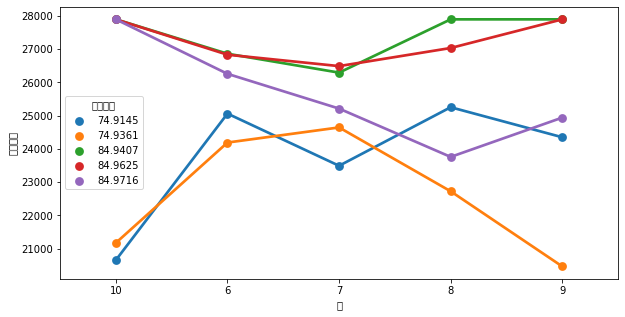

In [228]:
plt.figure(figsize=(10, 5))
sns.pointplot(x='월', y='보증금액', hue='전용면적', 
              data=df_sen_group)

In [ ]:
# hue = 전세, 월세 / seaborn에서 twinx로 표현할 수 있다.

In [220]:
df_sen.groupby(['월','전용면적'])['보증금액','월세금액'].mean().reset_index().sort_values(['보증금액','월세금액'], ascending=True)

,월,전용면적,보증금액,월세금액
21,9,74.9361,20468.703704,46.592593
0,10,74.9145,20660.000000,43.000000
1,10,74.9361,21176.500000,44.900000
16,8,74.9361,22726.000000,42.685714
10,7,74.9145,23492.419355,46.193548
19,8,84.9716,23759.000000,53.200000
6,6,74.9361,24190.500000,43.884615
20,9,74.9145,24349.285714,39.714286
11,7,74.9361,24644.428571,42.662857
24,9,84.9716,24939.571429,50.714286


In [ ]:
df_sen.groupby(['월','전용면적'])['보증금액'].mean()

In [187]:
df_sen = df[df['아파트'] == '센트레빌레우스1단지']

In [188]:
df_sen.columns

Index(['갱신요구권사용', '건축년도', '계약구분', '계약기간', '년', '법정동', '보증금액', '아파트', '월',
       '월세금액', '일', '전용면적', '종전계약보증금', '종전계약월세', '지번', '지역코드', '층'],
      dtype='object')

In [ ]:
df_sen[''] = df_sen['보증금액'].replace(',','')

In [ ]:
df_sen['월세금액'] = df_sen['월세금액'].astype(int)

In [ ]:
df_sen.groupby('월','전용면적')['월세금액'].mean()

In [89]:
for y in range(2020, 2022) :
    for m in range(1, 13) :
        url = 'DEAL_YMD=' + str(y) + str(m).zfill(2)
        print(url)
        

DEAL_YMD=202001
DEAL_YMD=202002
DEAL_YMD=202003
DEAL_YMD=202004
DEAL_YMD=202005
DEAL_YMD=202006
DEAL_YMD=202007
DEAL_YMD=202008
DEAL_YMD=202009
DEAL_YMD=202010
DEAL_YMD=202011
DEAL_YMD=202012
DEAL_YMD=202101
DEAL_YMD=202102
DEAL_YMD=202103
DEAL_YMD=202104
DEAL_YMD=202105
DEAL_YMD=202106
DEAL_YMD=202107
DEAL_YMD=202108
DEAL_YMD=202109
DEAL_YMD=202110
DEAL_YMD=202111
DEAL_YMD=202112


In [ ]:
soup = BeautifulSoup(req.text, 'xml')